<a href="https://www.kaggle.com/code/ishkag26/project-2-movie-rating-prediction?scriptVersionId=142461307" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**MOVIE RATING PREDICTION -**

> **Movie prediction is an important way to predict movie performance. Through data analysis, we can find the most popular genres, performance in recent years and how it affects the reputation of the next movie. As movie production incurs huge cost and efforts, our effort is to predict the percentage of success, so that production could be managed accordingly.**


**IMPORTING THE LIBRARIES**

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  


**LOADING THE DATASET**

**movies_data**

In [2]:
movie_data = pd.read_csv("/kaggle/input/netflix-movie-rating-dataset/Netflix_Dataset_Movie.csv")
movie_data

,Movie_ID,Year,Name
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004,Fidel Castro: American Experience
17767,17768,2000,Epoch
17768,17769,2003,The Company


**EXPLORING ROWS AND COLUMNS**

In [3]:
movie_data.info()        # information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie_ID  17770 non-null  int64 
 1   Year      17770 non-null  int64 
 2   Name      17770 non-null  object
dtypes: int64(2), object(1)
memory usage: 416.6+ KB


In [4]:
movie_data.describe()     # calculate the statistical data

,Movie_ID,Year
count,17770.000000,17770.000000
mean,8885.500000,1990.235566
std,5129.901477,16.564501
min,1.000000,1915.000000
25%,4443.250000,1985.000000
50%,8885.500000,1997.000000
75%,13327.750000,2002.000000
max,17770.000000,2005.000000


In [5]:
movie_data.head()     # first 5 rows of dataset

,Movie_ID,Year,Name
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW


In [6]:
for Name in movie_data.head()["Name"].values:    # top 5 movies name
    print(Name)

Dinosaur Planet
Isle of Man TT 2004 Review
Character
Paula Abdul's Get Up & Dance
The Rise and Fall of ECW


In [7]:
for Name in movie_data.sort_values(by = "Year",ascending = False).head()["Name"].values:
    print(Name)

Rize
LeapFrog: Learn to Read at the Storybook Factory
Pokemon: Destiny Deoxys
WWE: Wrestlemania 21
Warm Springs


In [8]:
movie_data.tail()   # last 5 rows of dataset

,Movie_ID,Year,Name
17765,17766,2002,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004,Fidel Castro: American Experience
17767,17768,2000,Epoch
17768,17769,2003,The Company
17769,17770,2003,Alien Hunter


In [9]:
# finding specific movie 

movie_data[movie_data["Name"] == "Fidel Castro: American Experience"]    

,Movie_ID,Year,Name
17766,17767,2004,Fidel Castro: American Experience


In [10]:
for Year in movie_data["Year"].tail():
    print(Year)

2002
2004
2000
2003
2003


In [11]:
a = 0
for Year in movie_data["Year"]:
    if(Year == 2003):
        a += 1
print(a)

1271


In [12]:
movie_data.shape

(17770, 3)

**DATA CLEANING**

In [13]:
movie_data.isnull()       # finding out null values

,Movie_ID,Year,Name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
17765,False,False,False
17766,False,False,False
17767,False,False,False
17768,False,False,False


In [14]:
movie_data.isnull().sum()   

Movie_ID    0
Year        0
Name        0
dtype: int64

In [15]:
movie_data.isnull().sum().sum()     # returns the number of missing value in dataset

0

**> Hence, conclusion comes that the dataset contains no NULL value.**

**ratings_data**

In [16]:
ratings_data = pd.read_csv("/kaggle/input/netflix-movie-rating-dataset/Netflix_Dataset_Rating.csv")
ratings_data

,User_ID,Rating,Movie_ID
0,712664,5,3
1,1331154,4,3
2,2632461,3,3
3,44937,5,3
4,656399,4,3
...,...,...,...
17337453,520675,3,4496
17337454,1055714,5,4496
17337455,2643029,4,4496
17337456,1559566,3,4496


In [17]:
ratings_data.isnull().sum()

User_ID     0
Rating      0
Movie_ID    0
dtype: int64

In [18]:
ratings_data.head() 

,User_ID,Rating,Movie_ID
0,712664,5,3
1,1331154,4,3
2,2632461,3,3
3,44937,5,3
4,656399,4,3


In [19]:
ratings_data.describe()

,User_ID,Rating,Movie_ID
count,1.733746e+07,1.733746e+07,1.733746e+07
mean,1.321158e+06,3.590570e+00,2.302783e+03
std,7.646923e+05,1.062665e+00,1.303458e+03
min,6.000000e+00,1.000000e+00,3.000000e+00
25%,6.602280e+05,3.000000e+00,1.176000e+03
50%,1.316775e+06,4.000000e+00,2.342000e+03
75%,1.983213e+06,4.000000e+00,3.433000e+03
max,2.649429e+06,5.000000e+00,4.496000e+03


In [20]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17337458 entries, 0 to 17337457
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   User_ID   int64
 1   Rating    int64
 2   Movie_ID  int64
dtypes: int64(3)
memory usage: 396.8 MB


**user data**

In [21]:
user_data = pd.read_csv("/kaggle/input/user-data/User_Data.csv")
user_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [22]:
user_data.head() 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [23]:
user_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [24]:
# LabelEncoder will assign the values as 0,1 to the categories 

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
user_data["Gender"] = labelencoder.fit_transform(user_data["Gender"])
user_data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
5,15728773,1,27,58000,0
6,15598044,0,27,84000,0
7,15694829,0,32,150000,1
8,15600575,1,25,33000,0
9,15727311,0,35,65000,0


In [25]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [26]:
user_data["Age"].mean()   # finding mean

37.655

In [27]:
user_data["Age"].median()   # finding median

37.0

In [28]:
# Concatenating the datasets

df_data = pd.concat([movie_data,ratings_data,user_data],axis = 1)
df_data.dropna()
df_data.head()

,Movie_ID,Year,Name,User_ID,Rating,Movie_ID,User ID,Gender,Age,EstimatedSalary,Purchased
0,1.0,2003.0,Dinosaur Planet,712664,5,3,15624510.0,1.0,19.0,19000.0,0.0
1,2.0,2004.0,Isle of Man TT 2004 Review,1331154,4,3,15810944.0,1.0,35.0,20000.0,0.0
2,3.0,1997.0,Character,2632461,3,3,15668575.0,0.0,26.0,43000.0,0.0
3,4.0,1994.0,Paula Abdul's Get Up & Dance,44937,5,3,15603246.0,0.0,27.0,57000.0,0.0
4,5.0,2004.0,The Rise and Fall of ECW,656399,4,3,15804002.0,1.0,19.0,76000.0,0.0


In [29]:
# handling missing values

df2 = df_data.dropna()
df2.head()

,Movie_ID,Year,Name,User_ID,Rating,Movie_ID,User ID,Gender,Age,EstimatedSalary,Purchased
0,1.0,2003.0,Dinosaur Planet,712664,5,3,15624510.0,1.0,19.0,19000.0,0.0
1,2.0,2004.0,Isle of Man TT 2004 Review,1331154,4,3,15810944.0,1.0,35.0,20000.0,0.0
2,3.0,1997.0,Character,2632461,3,3,15668575.0,0.0,26.0,43000.0,0.0
3,4.0,1994.0,Paula Abdul's Get Up & Dance,44937,5,3,15603246.0,0.0,27.0,57000.0,0.0
4,5.0,2004.0,The Rise and Fall of ECW,656399,4,3,15804002.0,1.0,19.0,76000.0,0.0


In [30]:
# removing columns which are not required

df2 = df2.drop(columns = ["Movie_ID","User_ID","EstimatedSalary","Purchased"])
df2

,Year,Name,Rating,User ID,Gender,Age
0,2003.0,Dinosaur Planet,5,15624510.0,1.0,19.0
1,2004.0,Isle of Man TT 2004 Review,4,15810944.0,1.0,35.0
2,1997.0,Character,3,15668575.0,0.0,26.0
3,1994.0,Paula Abdul's Get Up & Dance,5,15603246.0,0.0,27.0
4,2004.0,The Rise and Fall of ECW,4,15804002.0,1.0,19.0
...,...,...,...,...,...,...
395,2001.0,Arjuna: Complete Collection,3,15691863.0,0.0,46.0
396,1946.0,A Night in Casablanca,3,15706071.0,1.0,51.0
397,1976.0,In the Realm of the Senses,4,15654296.0,0.0,50.0
398,2001.0,Fangs,4,15755018.0,1.0,36.0


In [31]:
df2.shape

(400, 6)

**DATA VISUALIZATION** 

<Axes: xlabel='Gender', ylabel='count'>

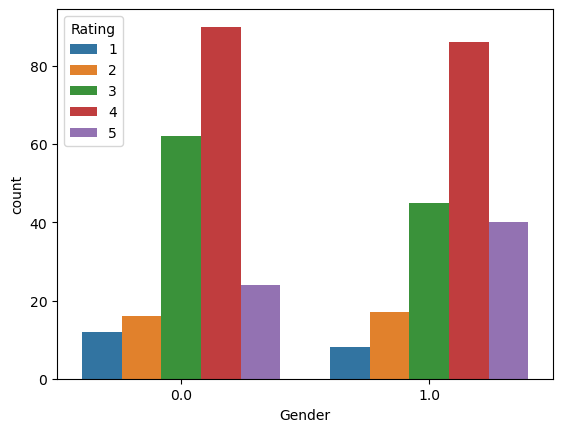

In [32]:
sns.countplot(x = df2["Gender"],hue = df2["Rating"])

> **As per the countplot observations, we can note that females and males both have rated greater part of the movies as 4 star but among them female count is higher.**

Text(0, 0.5, 'Rating')

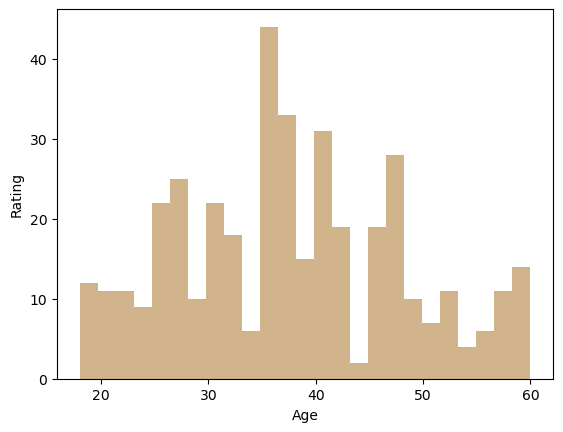

In [33]:
df2.Age.plot.hist(bins = 25,color = "tan")
plt.xlabel("Age")
plt.ylabel("Rating")

> **As per the histogram, the user having age nearby 35 has mostly rated the movies.**

In [34]:
df2.groupby("Year")["Rating"].mean().sort_values(ascending = False)

Year
1927.0    5.000000
1947.0    4.500000
1990.0    4.500000
1918.0    4.500000
1989.0    4.333333
            ...   
1943.0    2.000000
1954.0    2.000000
1921.0    2.000000
1950.0    1.000000
1958.0    1.000000
Name: Rating, Length: 63, dtype: float64

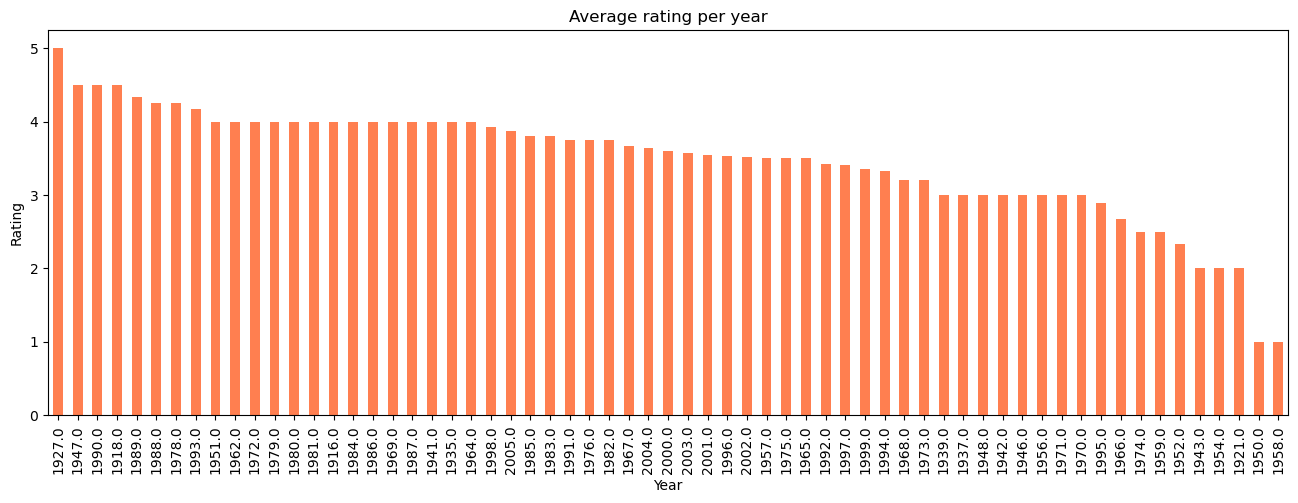

In [35]:
plt.figure(figsize=(20,8))
df2.groupby("Year")["Rating"].mean().sort_values(ascending = False).plot(x="Year",kind = "bar",figsize=(16,5),color = "coral")
plt.xticks()
plt.xlabel("Year")
plt.ylabel("Rating")
plt.title("Average rating per year")
plt.show()

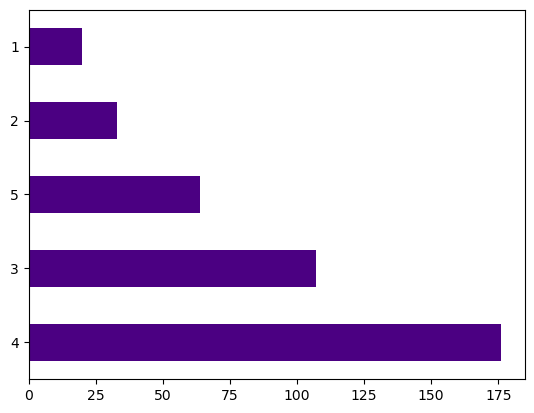

In [36]:
df2["Rating"].value_counts().plot(kind = "barh",color = "indigo")
plt.show()

> **As per the bar chart, most of the movies have been rated as 4**

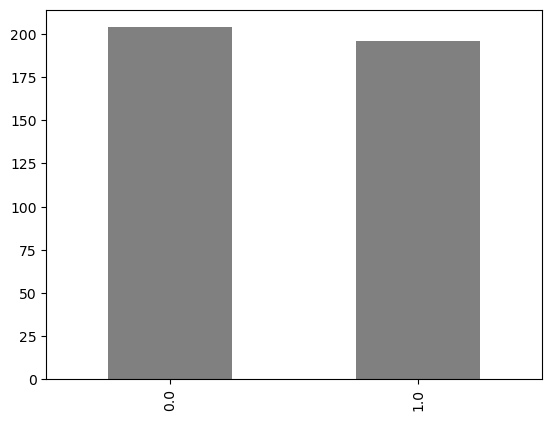

In [37]:
df2["Gender"].value_counts().plot(kind = "bar",color = "grey")
plt.show()

> **As per the bar chart trend, we can say that the females have rated the movies more than the males.**

In [38]:
ratings = df2["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values
import plotly.express as px
fig = px.pie(df2,values = quantity, names = numbers,labels = ratings.index)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:137: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return args["labels"][column]


> **So, according to the pie chart displayed above, the bulk of movies are rated as 4 by the users.**

**CONCLUSION**

**Consequently, with the help of Python Programming language, we've predicted the rating as well as came across other numerous aspects of the dataset and performed some Data Analytics techniques.**